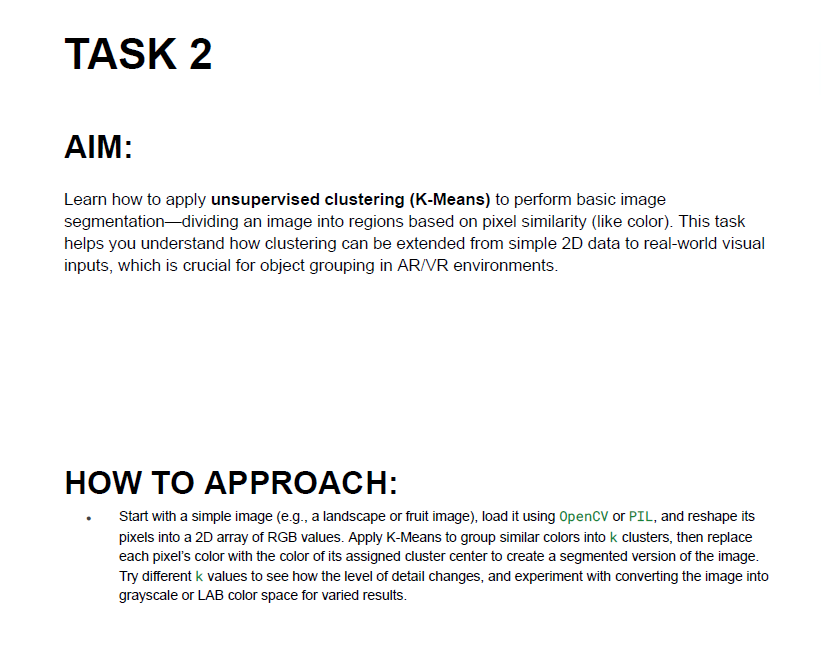

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Load and convert image to rgb

In [ ]:
image=cv2.imread('2_color.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

gray image

In [ ]:
image=cv2.imread('2_color.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

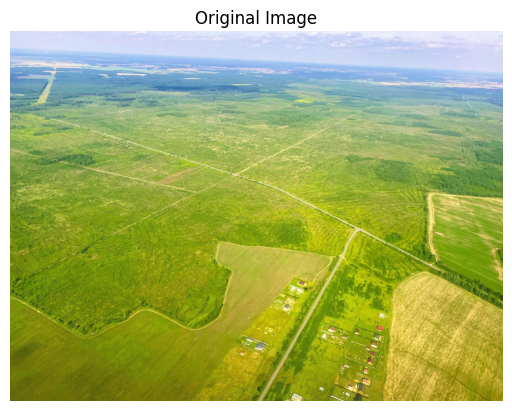

In [ ]:
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

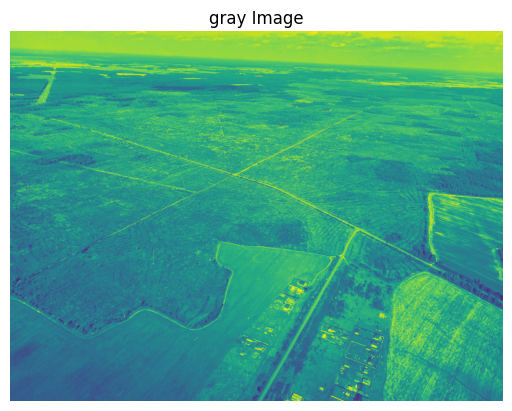

In [ ]:
plt.imshow(gray)
plt.title("gray Image")
plt.axis('off')
plt.show()

Flatten image

In [ ]:
pixel_values=image.reshape((-1,3))
pixel_values = np.float32(pixel_values)

Flatten grey image

In [ ]:
pixel_values=image.reshape((-1,1))
pixel_values = np.float32(pixel_values)


Definition for each parameter

generated by chatgpt

pixel_values is the reshaped version of the image, where each pixel is treated as a 3D point in RGB color space.

K is the number of color clusters we want (e.g., 3 means we want to segment the image into 3 main colors).

None tells OpenCV to randomly assign initial labels to pixels — we are not providing any predefined labels.

criteria defines when the algorithm should stop. We usually set it to a combination of: maximum number of iterations (like 100) and a minimum required movement of cluster centers (like 0.2).

10 is the number of times OpenCV will run the algorithm with different initial random cluster centers and pick the best result.

cv2.KMEANS_RANDOM_CENTERS tells OpenCV to randomly choose the initial cluster centers



labels, which tells you which cluster each pixel belongs to.

centers, which gives the RGB value of each cluster center — essentially, the dominant colors.

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 5
retval, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)


In [ ]:
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape(image.shape)

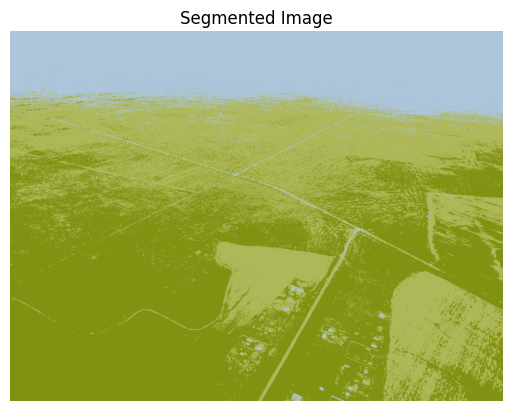

In [ ]:
plt.imshow(segmented_image)
plt.title("Segmented Image")
plt.axis('off')
plt.show()

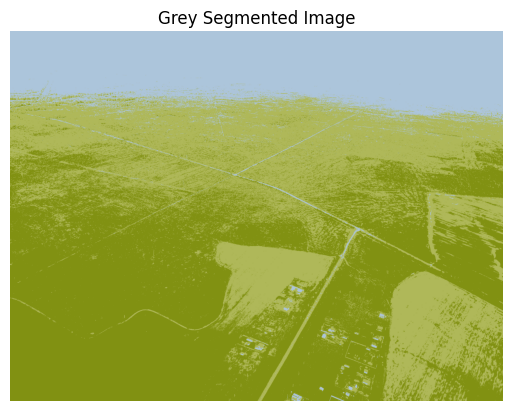

In [ ]:
plt.imshow(segmented_image)
plt.title("Grey Segmented Image")
plt.axis('off')
plt.show()